In [2]:
import os

os.chdir('../..')
os.chdir('../..')
print("Current working directory:", os.getcwd())

Current working directory: /dmj/fizmed/kchorzela/licencjat


In [13]:
print("Current working directory:", os.getcwd())

Current working directory: /dmj/fizmed/kchorzela/licencjat/eeg-site-effects


In [9]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, confusion_matrix
import logging
from old.harmonization import covbat, combat

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
save_path = f'results/tables/combat_vs_covbat'
os.makedirs(save_path, exist_ok=True)

In [1]:
def get_scores(y_true, y_prob, label_encoder):
    y_pred = label_encoder.inverse_transform(np.argmax(y_prob, axis=1))  # Get predicted class labels

    scores = {"MCC_Overall": matthews_corrcoef(y_true, y_pred),
              "Accuracy": accuracy_score(y_true, y_pred),
              "Precision (Macro)": precision_score(y_true, y_pred, average="macro", zero_division=0),
              "Precision (Weighted)": precision_score(y_true, y_pred, average="weighted", zero_division=0),
              "Recall (Macro)": recall_score(y_true, y_pred, average="macro", zero_division=0),
              "Recall (Weighted)": recall_score(y_true, y_pred, average="weighted", zero_division=0),
              "F1-Score (Macro)": f1_score(y_true, y_pred, average="macro", zero_division=0),
              "F1-Score (Weighted)": f1_score(y_true, y_pred, average="weighted", zero_division=0),
              "AUC (OvR)": roc_auc_score(y_true, y_prob, multi_class="ovr"),
              "AUC (OvO)": roc_auc_score(y_true, y_prob, multi_class="ovo")}

    mcc_per_class = {
        f"MCC_{cls}": matthews_corrcoef((y_true == cls).astype(int), (y_pred == cls).astype(int))
        for cls in label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    }
    scores.update(mcc_per_class)

    return scores

def compute_confusion_matrix(y_true, y_prob, label_encoder):
    y_pred = label_encoder.inverse_transform(np.argmax(y_prob, axis=1))
    cm = confusion_matrix(y_true, y_pred, labels=label_encoder.inverse_transform(range(len(label_encoder.classes_))))

    return cm

In [9]:
label_encoder = LabelEncoder()
df_info['institution_id_encoded'] = label_encoder.fit_transform(df_info['institution_id'])
hospital_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

In [10]:
import patsy

# 1: Harmonization prep (all, coh, pow, cov)

In [4]:
feature_groups = {
    "all": [col for col in df_feats.columns],
    "coh": [col for col in df_feats.columns if col.startswith("coh")],
    "pow": [col for col in df_feats.columns if col.startswith("pow")],
    "cov": [col for col in df_feats.columns if col.startswith("cov")]
}

NameError: name 'df_feats' is not defined

In [14]:
covars = pd.DataFrame()
covars['batch'] = df_info['institution_id']
covars['gender'] = df_info['patient_sex']
covars['age'] = df_info['age_dec']

model_matrix = patsy.dmatrix("~ age + gender", covars, return_type='dataframe')
numerical_covariates = ['age']

In [21]:
harmonization_data = {}
for feature_group, features in feature_groups.items():
    harmonization_data[feature_group] = {}
    harmonization_data[feature_group]['raw'] = df_feats.loc[:, features].copy()
    harmonization_data[feature_group]['combat'] = combat(
        data=df_feats.loc[:, features].T.copy(),
        batch=covars['batch'],
        model=model_matrix,
        numerical_covariates=numerical_covariates
    ).T
    
    harmonization_data[feature_group]['covbat'] = covbat(
        data=df_feats.loc[:, features].T.copy(),
        batch=covars['batch'],
        model=model_matrix,
        numerical_covariates=numerical_covariates
    ).T

found 30 batches
found 1 numerical covariates...
	age
found 1 categorical variables:	gender[T.Male]
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 1 numerical covariates...
	age
found 1 categorical variables:	gender[T.Male]
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 1 numerical covariates...
	age
found 1 categorical variables:	gender[T.Male]
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 1 numerical covariates...
	age
found 1 categorical variables:	gender[T.Male]
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 1 numerical covariates...
	age
found 1 categorical variables:	gender[T.Male]
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 1 numerical covariates...
	age
found 1 categorical variables:	gender[T.Male]
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 1 numerical covariates...
	age
found 1 categorical variables:	gender[T.Male]
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 1 numerical covariates...
	age
found 1 categorical variables:	gender[T.Male]
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


found 30 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


In [22]:
hospitals_to_compare = hospital_names

cov_matrices_data = {}
for feature_group, harmonization in harmonization_data.items():
    cov_matrices_data[feature_group] = {}
    for harm_type, harm_features in harmonization.items():
        cov_matrices_data[feature_group][harm_type] = {}
        for hospital_id in hospitals_to_compare:
            hospital_mask = (df_info['institution_id'] == hospital_id)
            hospital_feats = harm_features.loc[hospital_mask.values].copy()
            
            cov_matrix = hospital_feats.cov()
            cov_matrices_data[feature_group][harm_type][hospital_id] = cov_matrix

In [32]:
import pickle

with open(os.path.join(save_path, "harmonization_data.pkl"), "wb") as f:
    pickle.dump(harmonization_data, f)

with open(os.path.join(save_path, "cov_matrices_data.pkl"), "wb") as f:
    pickle.dump(cov_matrices_data, f)

# Analyze Matrices

/tmp/ipykernel_3772390/2989678516.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


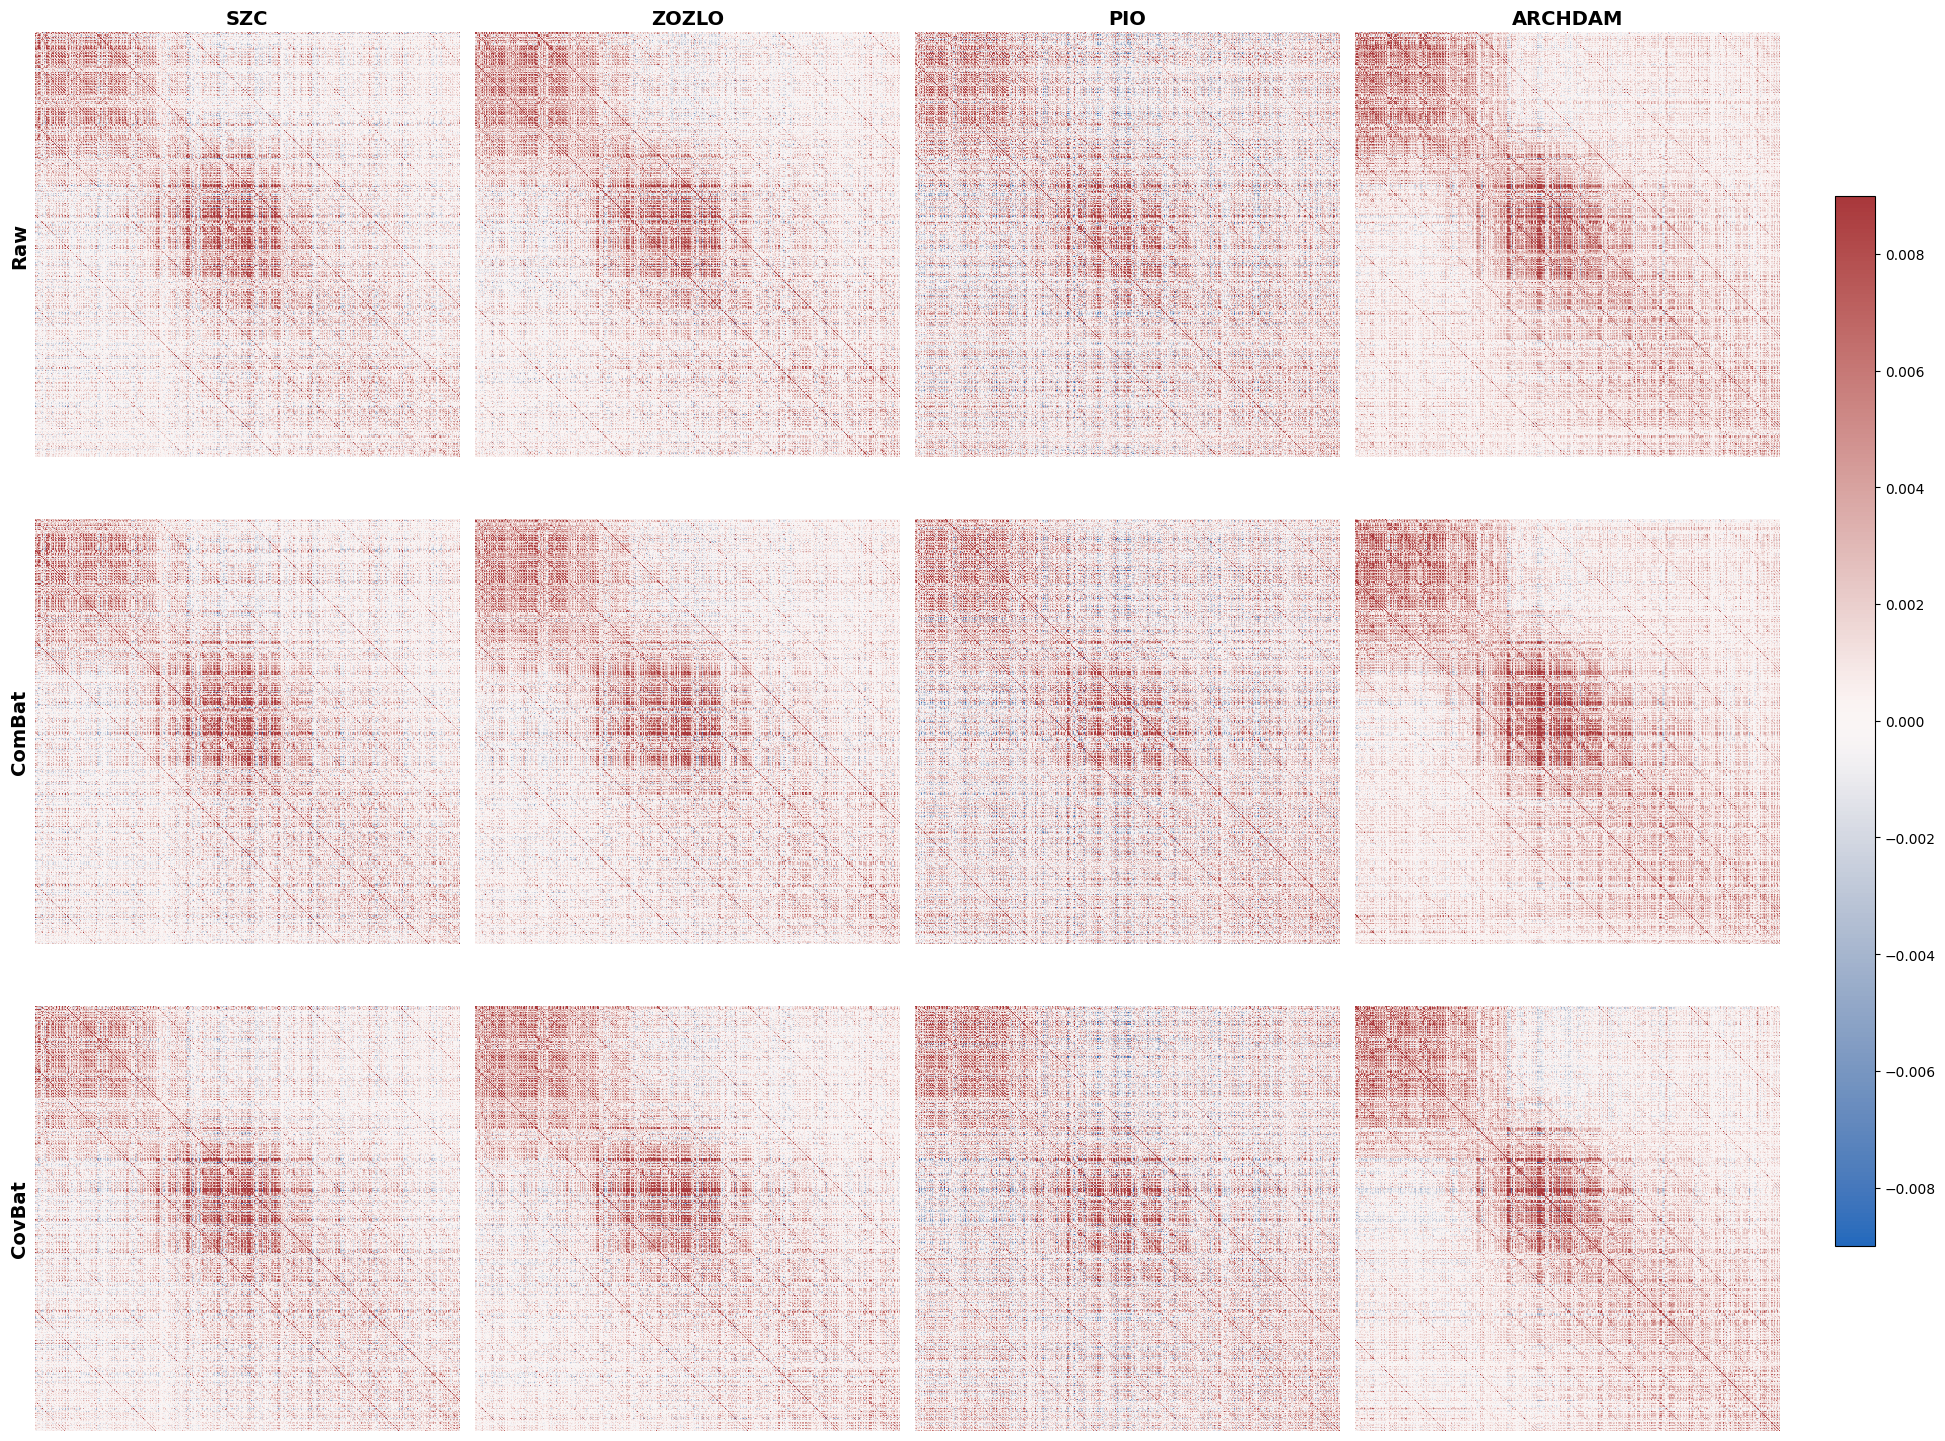

In [97]:
fig, axes = plt.subplots(n_harm_types, n_hospitals, figsize=(n_hospitals * 5, n_harm_types * 5), sharex=True, sharey=True)

all_vals = np.concatenate([mat.values.flatten() for harm in cov_matrices.values() for mat in harm.values()])
vmax = np.percentile(np.abs(all_vals), 99)
vmin = -vmax

for i, (harm_type, matrices) in enumerate(cov_matrices.items()):
    for j, hospital_id in enumerate(hospitals_to_compare):
        ax = axes[i, j]
        matrix_to_plot = matrices[hospital_id]
        
        sns.heatmap(matrix_to_plot, ax=ax, cmap='vlag', vmin=vmin, vmax=vmax, cbar=False, square=True)
        
        if j == 0:
            ax.set_ylabel(harm_type, fontsize=14, fontweight='bold')
        if i == 0:
            ax.set_title(hospital_id, fontsize=14, fontweight='bold')
            
        ax.set_xticks([])
        ax.set_yticks([])

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap='vlag', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm, cax=cbar_ax)
plt.show()

In [95]:
from itertools import combinations
results = []

for harm_type, matrices in cov_matrices.items():
    for h1, h2 in combinations(hospitals_to_compare, 2):
        matrix1 = matrices[h1]
        matrix2 = matrices[h2]
        
        distance = np.linalg.norm(matrix1 - matrix2, 'fro')
        
        results.append({
            'Harmonizacja': harm_type,
            'Para szpitali': f"{h1} vs {h2}",
            'Odległość Frobeniusa': distance
        })

df_results = pd.DataFrame(results)
df_results_2 = df_results.pivot(
    index='Para szpitali',
    columns='Harmonizacja',
    values='Odległość Frobeniusa'
).reset_index()

In [96]:
df_results_2

Harmonizacja     Para szpitali    ComBat    CovBat       Raw
0               PIO vs ARCHDAM  5.423120  5.195505  5.491433
1               SZC vs ARCHDAM  3.854023  3.734511  3.855344
2                   SZC vs PIO  4.841604  4.697728  4.921339
3                 SZC vs ZOZLO  3.261499  3.187688  3.263452
4             ZOZLO vs ARCHDAM  3.916332  3.783518  3.938070
5                 ZOZLO vs PIO  4.852484  4.733513  4.940358

# 2: Catboost model

In [35]:
params = {'iterations': 2000,
          'learning_rate': 0.2136106733298358,
          'depth': 5.0,
          'l2_leaf_reg': 1.0050061307458207,
          'eval_metric': 'MultiClass',
          'task_type': "GPU"
}

In [39]:
import logging
import os

log_file = os.path.join(save_path, "training.log")

# Clear existing handlers (optional but safe)
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Create logger
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Create file handler
fh = logging.FileHandler(log_file, mode='a')  # append mode
fh.setLevel(logging.INFO)

# Create formatter and add to handler
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
fh.setFormatter(formatter)

# Add handler to logger
logger.addHandler(fh)

# Optional: also log to console
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
ch.setFormatter(formatter)
logger.addHandler(ch)


In [40]:
logging.basicConfig(
    filename=os.path.join(save_path, 'training.log'),
    filemode='a',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)


In [ ]:
harmonization_data['cov']['raw']

In [ ]:
for feature_group, harmonization in harmonization_data.items():
    for harm_type, harm_features in harmonization.items():
        logging.info(f"Starting training for Feature Group: '{feature_group}', Harmonization Type: '{harm_type}'")

        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
        X = harm_features.copy()
        y = df_info['institution_id'].copy()

        fold_metrics_list = []
        fold_confusion_matrices = {}
        all_y_true = []
        all_y_pred_proba = []
        for fold_num, (train_idx, test_idx) in enumerate(kf.split(X, y)):
            logging.info(f"Starting fold {fold_num+1}/5")

            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            logging.info("Initializing the Catboost model...")
            model = CatBoostClassifier(**params)

            logging.info("Training the model...")
            model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False, plot=False)
            logging.info("Model training completed.")

            logging.info("Generating predictions...")
            y_prob = model.predict_proba(X_test)
            logging.info("Predictions generated successfully.")

            # 1. Get and store scores for the fold
            scores_fold = get_scores(y_test, y_prob, label_encoder)
            scores_fold['fold'] = fold_num + 1
            fold_metrics_list.append(scores_fold)
            logging.info(f"Results saved.")

            # 2. Get and store confusion matrix for the fold
            cm_fold = compute_confusion_matrix(y_test, y_prob, label_encoder)
            fold_confusion_matrices[f'fold_{fold_num+1}_cm'] = cm_fold

            # 3. Collect out-of-fold predictions
            all_y_true.extend(y_test)
            all_y_pred_proba.extend(y_prob)

        fold_metrics_df = pd.DataFrame(fold_metrics_list)
        fold_metrics_df.to_csv(os.path.join(save_path, f"{feature_group}_{harm_type}_cv_fold_metrics.csv"), index=False)
        logging.info("Fold metrics saved.")

        aggregated_metrics_mean = fold_metrics_df.drop(columns=['fold']).mean().to_frame('mean_value')
        aggregated_metrics_std = fold_metrics_df.drop(columns=['fold']).std().to_frame('std_value')
        aggregated_metrics_summary = pd.concat([aggregated_metrics_mean, aggregated_metrics_std], axis=1)
        aggregated_metrics_summary.to_csv(os.path.join(save_path, f"{feature_group}_{harm_type}_cv_aggregated_metrics_summary.csv"))
        logging.info("Aggregated metrics summary saved.")

        np.savez_compressed(os.path.join(save_path, f"{feature_group}_{harm_type}_cv_fold_confusion_matrices.npz"), labels=hospital_names, **fold_confusion_matrices)
        logging.info("Fold confusion matrices saved.")

In [15]:
catboost_results = {}

for feature_group in ['all', 'coh', 'cov', 'pow']:
    catboost_results[feature_group] = {}
    for harm_type in ['combat']:
        try:
            results_temp = pd.read_csv(os.path.join(save_path, f"{feature_group}_{harm_type}_cv_aggregated_metrics_summary.csv"), index_col=0)
            results_temp = results_temp['mean_value'][results_temp.index.str.startswith("MCC_")]
            results_temp = results_temp.drop("MCC_Overall", errors='ignore')
            catboost_results[feature_group][harm_type] = results_temp.copy()
        except FileNotFoundError:
            logging.warning(f"File not found: {feature_group}_{harm_type}_cv_aggregated_metrics_summary.csv")

In [16]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['black', 'tomato', 'skyblue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']

for feature_group, harm_dict in catboost_results.items():
    plt.figure(figsize=(14, 6))

    # Find all class labels (hospital IDs) from the first harm_type
    first_harm = list(harm_dict.keys())[0]
    class_labels = harm_dict[first_harm].index.values

    # Optionally, sort by one of the series (here by first harm type)
    sort_idx = harm_dict[first_harm].values.argsort()[::-1]
    class_labels_sorted = class_labels[sort_idx]

    # Plot each harm type
    for i, (harm_type, results_series) in enumerate(harm_dict.items()):
        mcc_values = results_series.values[sort_idx]
        plt.plot(
            class_labels_sorted,
            mcc_values,
            marker='o',
            linestyle='-',
            color=colors[i % len(colors)],
            label=harm_type
        )

    plt.ylabel("Average MCC", fontsize=13)
    plt.xlabel("Hospital ID", fontsize=13)
    plt.xticks(rotation=90, fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='upper right', fontsize=11)
    plt.ylim(0, 1.2)

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'results/figures/harmonization/{feature_group}_mcc_harmonization.png', dpi=300)
    plt.show()


IndexError: list index out of range

<Figure size 1400x600 with 0 Axes>

In [ ]:
color_grid = [
    'black', 'tomato', 'skyblue', 'green',
    'orange', 'purple', 'brown', 'cyan',
    'magenta', 'yellow', 'pink', 'lime'
]
plt.figure(figsize=(16, 7))

# First, collect all unique hospital IDs
all_hospitals = sorted({h for fg in catboost_results.values() for harm_dict in fg.values() for h in harm_dict.index})

# For each feature group and harm type, plot
for fg_idx, (feature_group, harm_dict) in enumerate(catboost_results.items()):
    for ht_idx, (harm_type, results_series) in enumerate(harm_dict.items()):
        # Align MCC values to all hospitals (fill missing with np.nan)
        mcc_values = [results_series.get(h, np.nan) for h in all_hospitals]

        plt.plot(
            all_hospitals,
            mcc_values,
            marker=markers[fg_idx % len(markers)],
            linestyle='-',
            color=harm_type_colors[ht_idx % len(harm_type_colors)],
            label=f"{feature_group} — {harm_type}"
        )

plt.ylabel("Average MCC", fontsize=13)
plt.xlabel("Hospital ID", fontsize=13)
plt.xticks(rotation=90, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.2)
plt.legend(loc='upper right', fontsize=10, ncol=2)
plt.tight_layout()

plt.savefig('results/figures/harmonization/all_features_all_harm_types_mcc.png', dpi=300)
plt.show()